In [58]:
import pandas as pd
from pathlib import Path
import spacy
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from spacy.lang.es.stop_words import STOP_WORDS
nlp = spacy.load("es_core_news_sm")

In [59]:
dataset = []
values = Path("Datasets\informe_completo").glob("*.csv")
for value in values:
    dataset.append(pd.read_csv(value))

dataset = pd.concat(dataset)
resultado = dataset["resultado"]

In [40]:
print("Total de Intervencion:", dataset["intervencion"].isna().sum()/dataset.shape[0] * 100, "%")

Total de Intervencion: 51.604356785398885 %


In [29]:
print("Total de valores nulos en resultados:", dataset.resultado.isna().sum()/dataset.shape[0] * 100, "%")

Total de valores nulos en resultados: 51.66323226376214 %


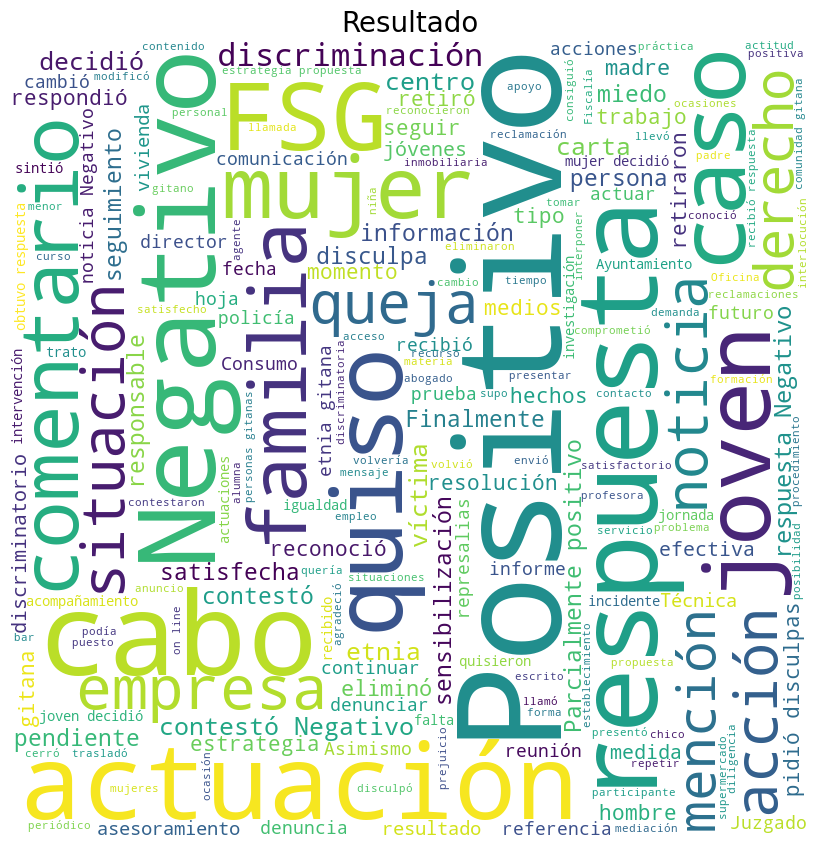

In [54]:
def plots_world_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOP_WORDS, 
                    min_font_size = 10,
                    ).generate(" ".join(text))

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=20)
    plt.show()

plots_world_cloud(resultado.dropna(), "Resultado")

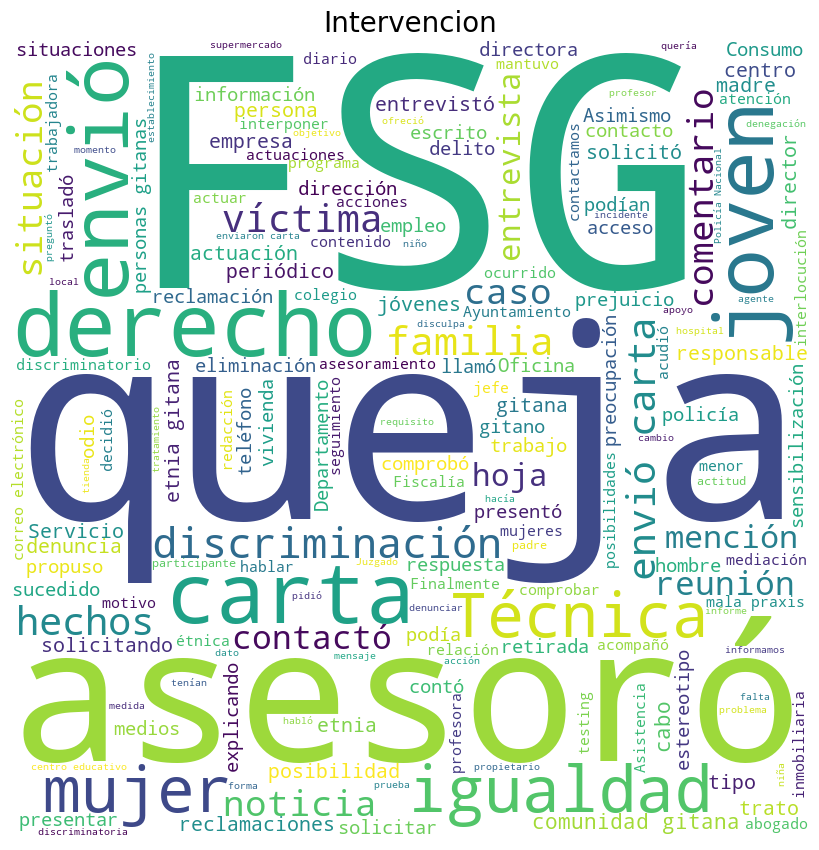

In [55]:
plots_world_cloud(dataset["intervencion"].dropna(), "Intervencion")

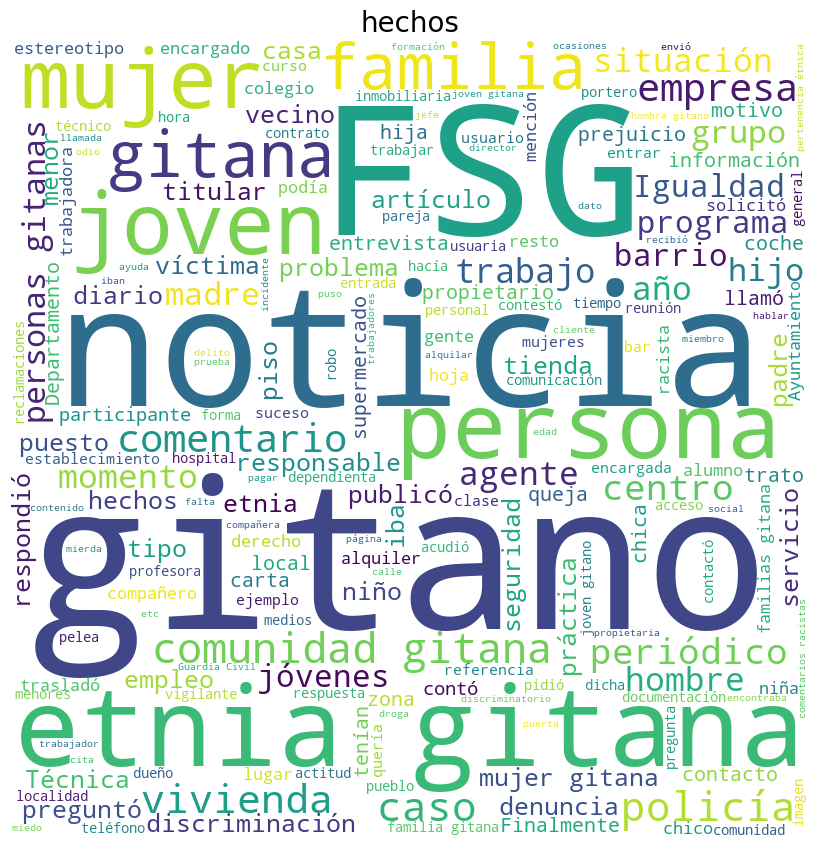

In [57]:
plots_world_cloud(dataset["hechos"].dropna(), "hechos")

In [60]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

c:\Users\froro\OneDrive\Escritorio\Hackaton\.nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
print(dir(analyzer.predict("Me gusta la pizza")))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'is_multilabel', 'output', 'probas', 'sentence']


In [73]:
import numpy as np	
def get_sentiment(text):
    if text is np.nan:
        return np.nan
    predict = analyzer.predict(text)
    tag = predict.output
    prob = predict.probas[tag]
    return tag, prob

dataset[['sentiment', 'prob']] = dataset['resultado'].apply(get_sentiment).apply(pd.Series)

In [74]:
dataset.to_csv("Datasets/informe_completo_score.csv", index=False)

In [75]:
dataset

,hechos,intervencion,resultado,fecha_hechos,fecha_denuncia,provincia,ambito,tipo_desciminacion,reference,link,sentiment,prob
0,El periódico digital Salamanca24h publicó una ...,"Se envió carta a la dirección del medio, con c...",Negativo. El medio no contestó.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Salamanca,Medios de comunicación,Discriminación directa,['https://www.salamanca24horas.com/sucesos/pol...,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.507522
1,El diario Lanza Digital publicó una noticia en...,Enviamos carta a la directora del diario trasm...,Positivo. Se eliminó la mención a la etnia de ...,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Ciudad Real,Medios de comunicación,Discriminación directa,['https://www.lanzadigital.com/provincia/puert...,https://informesdiscriminacion.gitanos.org/cas...,NEU,0.772065
2,El diario ABC de Sevilla publicó una noticia c...,Se mantuvo una conversación telefónica con un ...,Positivo. Se consiguió que rectificaran.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Sevilla,Medios de comunicación,Discriminación directa,['https://sevilla.abc.es/provincia/sevi-invest...,https://informesdiscriminacion.gitanos.org/cas...,POS,0.661231
3,En la versión digital del diario Última hora s...,Se envió un correo al medio solicitándole la e...,Negativo. El medio no contestó.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Baleares,Medios de comunicación,Discriminación directa,['https://www.ultimahora.es/sucesos/ultimas/20...,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.507522
4,Dos medios de comunicación de Asturias se hici...,Se enviaron cartas a ambos medios solicitando ...,Negativo.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Asturias,Medios de comunicación,Discriminación directa,['https://www.lne.es/oviedo/2021/02/15/detenid...,https://informesdiscriminacion.gitanos.org/cas...,NEU,0.549190
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Una mujer gitana contactó con un trabajador de...,Desde la FSG entrevistamos a la mujer telefóni...,No se ha obtenido ninguna respuesta por parte ...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Jaén,Vivienda,Discriminación directa,NaN,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.871719
96,Una mujer gitana fue a ver un piso para alquil...,Desde la FSG se asesoró a la mujer en cuanto a...,La mujer decidió no seguir adelante con la est...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,A Coruña,Vivienda,Discriminación directa,NaN,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.845201
97,En las redes sociales se difundió que una fami...,Desde la FSG se contactó con la familia y se c...,No se pudieron llevar a cabo denuncias concret...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Badajoz,Vivienda,Discriminación directa,NaN,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.963536
98,Un hombre gitano quiso contratar los servicios...,Desde la FSG se informó a la víctima sobre sus...,Positivo. La comunidad va a proceder al cambio...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Toledo,Vivienda,Discriminación directa,NaN,https://informesdiscriminacion.gitanos.org/cas...,NEU,0.853783
